Problem 4: Using Various Regression Models to predict the Weight of a fish for given lengths and category variables.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
dataset = pd.read_csv('Fish.csv')

dataset.head()




,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our filtered data is ready to use.

Divide the data in X and y

In [3]:
dataset.shape

(159, 7)

The data has 159 rows and 7 columns.

Since we need to predict the weight for the given data, we need to rearrange the data so that weight is the last column.

In [4]:
dataset = dataset[['Species','Length1','Length2','Length3', 'Height', 'Width', 'Weight']]
dataset.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


Data analysis.

Species wise. We can see there are 7 species.

In [5]:
dataset.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
sp = dataset['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


Detect the outliers based on the weight.

For this Outlier Detection I have used Quantile Method

In [7]:
dw = dataset['Weight']
dw_Q1 = dw.quantile(0.25)
dw_Q3 = dw.quantile(0.75)
dw_IQR = dw_Q3 - dw_Q1
dw_low = dw_Q1 - (1.7 * dw_IQR)
dw_up = dw_Q3 + (1.7 * dw_IQR)

dfw_outliers = dw[(dw < dw_low) | (dw > dw_up)]
dfw_outliers

142    1600.0
144    1650.0
Name: Weight, dtype: float64

Drop These Outlier

In [8]:
dataset = dataset.drop([142,143,144])

For each species we will calculate Avg, Min and Max values of Length1, Length2, Length3, Height, Width and Weight.

In [9]:
print(dataset[dataset['Species'] == 'Perch'].mean())

Length1     25.735714
Length2     27.892857
Length3     29.571429
Height       7.861870
Width        4.745723
Weight     382.239286
dtype: float64


<ipython-input-9-7b12dd282b6d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Perch'].mean())


In [10]:
print(dataset[dataset['Species'] == 'Bream'].mean())

Length1     30.305714
Length2     33.108571
Length3     38.354286
Height      15.183211
Width        5.427614
Weight     617.828571
dtype: float64


<ipython-input-10-c338a57c7185>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Bream'].mean())


In [11]:
print(dataset[dataset['Species'] == 'Roach'].mean())

Length1     20.645000
Length2     22.275000
Length3     24.970000
Height       6.694795
Width        3.657850
Weight     152.050000
dtype: float64


<ipython-input-11-4b12affa8e56>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Roach'].mean())


In [12]:
print(dataset[dataset['Species'] == 'Pike'].mean())

Length1     39.364286
Length2     42.128571
Length3     45.157143
Height       7.223007
Width        4.764321
Weight     529.857143
dtype: float64


<ipython-input-12-ff434d0550ff>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Pike'].mean())


In [13]:
print(dataset[dataset['Species'] == 'Smelt'].mean())

Length1    11.257143
Length2    11.921429
Length3    13.035714
Height      2.209371
Width       1.340093
Weight     11.178571
dtype: float64


<ipython-input-13-c631a5426ad8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Smelt'].mean())


In [14]:
print(dataset[dataset['Species'] == 'Parkki'].mean())

Length1     18.727273
Length2     20.345455
Length3     22.790909
Height       8.962427
Width        3.220736
Weight     154.818182
dtype: float64


<ipython-input-14-c3e9072c03a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Parkki'].mean())


In [15]:
print(dataset[dataset['Species'] == 'Whitefish'].mean())

Length1     28.800000
Length2     31.316667
Length3     34.316667
Height      10.027167
Width        5.473050
Weight     531.000000
dtype: float64


<ipython-input-15-af8fb1169cfc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset[dataset['Species'] == 'Whitefish'].mean())


Detecting the correlation to remove redundant variables. I plotted a Heatmap of correlation for given variables.

<ipython-input-16-eef7c75a2077>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')


<Axes: >

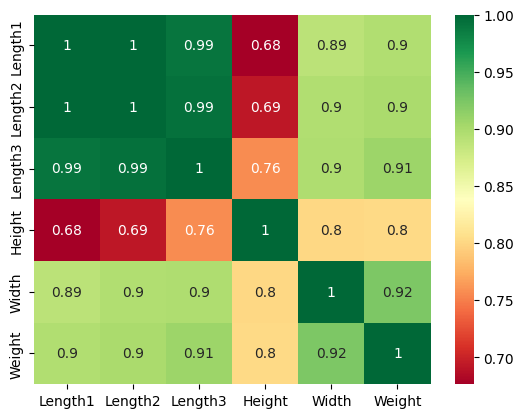

In [16]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')

As we can see that Length1, Length2, Length3 strongly correlate with each other.
Hence we can remove either 2 of them.

In [17]:
dataset = dataset.drop(['Length2','Length3'],axis=1)
dataset.columns

Index(['Species', 'Length1', 'Height', 'Width', 'Weight'], dtype='object')

<ipython-input-18-eef7c75a2077>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')


<Axes: >

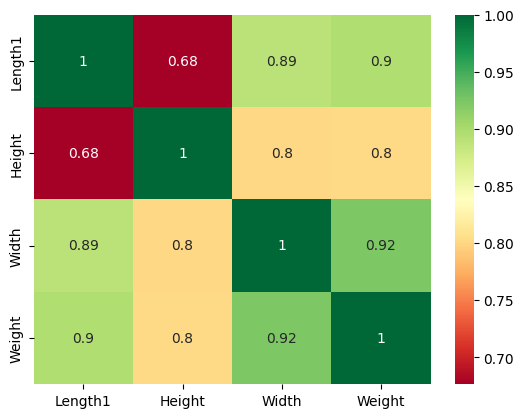

In [18]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')

Divide the Dataset into Two datasets

In [19]:
dataset1 = dataset.iloc[:, :-1]
dataset1 = pd.get_dummies(dataset1)
dataset2 = dataset.iloc[:,-1]
dataset1.columns

Index(['Length1', 'Height', 'Width', 'Species_Bream', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish'],
      dtype='object')

In [20]:
X = dataset1.values
y = dataset2.values
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
len(X_test)

32

Check example of X_Train

In [23]:
print(X_train[1])

[22.     6.375  3.825  0.     0.     1.     0.     0.     0.     0.   ]


## Feature Scaling(Only for SVM)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_fs = sc_X.fit_transform(X_train)
y_train_fs = sc_y.fit_transform(y_train)

## Training all Models on the Training set

Training The set on Multiple Linear Regression(Unscaled)

In [25]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred_mlr = regressor_mlr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_mlr.reshape(len(y_pred_mlr),1), y_test.reshape(len(y_test),1)),1))

[[727.27 720.  ]
 [512.57 390.  ]
 [ 31.16  78.  ]
 [755.29 685.  ]
 [697.88 700.  ]
 [418.7  390.  ]
 [188.22 160.  ]
 [388.43 300.  ]
 [563.13 500.  ]
 [117.54   0.  ]
 [154.33 110.  ]
 [241.97 180.  ]
 [409.65 320.  ]
 [861.32 850.  ]
 [309.36 270.  ]
 [-10.99   8.7 ]
 [949.46 975.  ]
 [891.97 820.  ]
 [156.81 145.  ]
 [245.19 200.  ]
 [ -2.33   9.7 ]
 [490.51 450.  ]
 [662.07 770.  ]
 [734.27 800.  ]
 [802.79 840.  ]
 [ 24.09  13.4 ]
 [165.42 130.  ]
 [-81.75  60.  ]
 [128.17 115.  ]
 [138.63 150.  ]
 [594.37 700.  ]
 [604.07 650.  ]]


In [27]:
from sklearn.metrics import r2_score, accuracy_score
print(r2_score(y_test, y_pred_mlr))
print(regressor_mlr.intercept_)
print(regressor_mlr.coef_)

0.9576964568591753
[-626.27]
[[  15.29   48.75   43.82 -200.12  -96.12   30.57   -6.54   -9.18  297.42
   -16.04]]


In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(regressor_mlr, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train.mean())

0.9079516864378465


Training the Scaled set on MultiLinear Regression

Training The set on Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor_ply = LinearRegression()
regressor_ply.fit(X_poly, y_train)

LinearRegression()

In [30]:
y_pred_plr = regressor_ply.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_plr.reshape(len(y_pred_plr),1), y_test.reshape(len(y_test),1)),1))

[[ 7.33e+02  7.20e+02]
 [ 4.24e+02  3.90e+02]
 [ 4.37e+01  7.80e+01]
 [ 7.38e+02  6.85e+02]
 [ 6.88e+02  7.00e+02]
 [ 4.43e+02  3.90e+02]
 [ 1.92e+02  1.60e+02]
 [ 3.26e+02  3.00e+02]
 [ 5.49e+02  5.00e+02]
 [ 1.22e+02  0.00e+00]
 [ 1.77e+02  1.10e+02]
 [ 1.38e+02  1.80e+02]
 [ 3.50e+02  3.20e+02]
 [ 8.71e+02  8.50e+02]
 [ 2.41e+02  2.70e+02]
 [ 1.22e+01  8.70e+00]
 [ 1.11e+03  9.75e+02]
 [ 9.30e+02  8.20e+02]
 [ 1.25e+02  1.45e+02]
 [ 1.00e+02  2.00e+02]
 [-7.76e+00  9.70e+00]
 [ 4.29e+02  4.50e+02]
 [ 7.12e+02  7.70e+02]
 [ 8.10e+02  8.00e+02]
 [ 8.26e+02  8.40e+02]
 [-4.10e-01  1.34e+01]
 [ 1.50e+02  1.30e+02]
 [ 2.71e+01  6.00e+01]
 [ 1.24e+02  1.15e+02]
 [ 1.68e+02  1.50e+02]
 [ 5.78e+02  7.00e+02]
 [ 6.38e+02  6.50e+02]]


In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_plr))

0.9678689478605613


In [32]:
cross_val_score_train = cross_val_score(regressor_ply, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train.mean())

0.9079516864378465


Training The set on SVM Regression with feature-scaled data.

In [33]:
from sklearn.svm import SVR
regressor_svm = SVR(kernel = 'rbf')
regressor_svm.fit(X_train_fs, y_train_fs)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
y_pred_svm = sc_y.inverse_transform(regressor_svm.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[762.16 720.  ]
 [369.97 390.  ]
 [104.14  78.  ]
 [754.21 685.  ]
 [712.89 700.  ]
 [409.32 390.  ]
 [168.66 160.  ]
 [291.45 300.  ]
 [560.59 500.  ]
 [134.03   0.  ]
 [132.65 110.  ]
 [198.36 180.  ]
 [317.26 320.  ]
 [873.08 850.  ]
 [303.17 270.  ]
 [ 37.59   8.7 ]
 [956.36 975.  ]
 [902.97 820.  ]
 [152.88 145.  ]
 [231.92 200.  ]
 [ 37.14   9.7 ]
 [475.96 450.  ]
 [675.11 770.  ]
 [569.95 800.  ]
 [816.24 840.  ]
 [ 38.48  13.4 ]
 [118.82 130.  ]
 [ 87.15  60.  ]
 [103.05 115.  ]
 [122.8  150.  ]
 [600.96 700.  ]
 [634.62 650.  ]]


In [35]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_svm))

0.960879502667614


In [36]:
cross_val_score_train = cross_val_score(regressor_svm, X_train_fs, y_train_fs, cv=10, scoring='r2')
print(cross_val_score_train.mean())

0.9386866074899286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training The set on Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor(random_state = 0)
regressor_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
y_pred_dtr = regressor_dtr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dtr.reshape(len(y_pred_dtr),1), y_test.reshape(len(y_test),1)),1))

[[ 725.   720. ]
 [ 514.   390. ]
 [  80.    78. ]
 [ 700.   685. ]
 [ 714.   700. ]
 [ 450.   390. ]
 [ 150.   160. ]
 [ 450.   300. ]
 [ 567.   500. ]
 [ 140.     0. ]
 [ 120.   110. ]
 [ 218.   180. ]
 [ 450.   320. ]
 [ 900.   850. ]
 [ 300.   270. ]
 [   9.8    8.7]
 [1100.   975. ]
 [1015.   820. ]
 [ 150.   145. ]
 [ 300.   200. ]
 [   7.5    9.7]
 [ 500.   450. ]
 [ 650.   770. ]
 [ 700.   800. ]
 [ 680.   840. ]
 [  12.2   13.4]
 [ 150.   130. ]
 [  55.    60. ]
 [ 120.   115. ]
 [ 130.   150. ]
 [ 700.   700. ]
 [ 500.   650. ]]


In [39]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_dtr))

0.9245489301330211


In [40]:
cross_val_score_train = cross_val_score(regressor_dtr, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train.mean())

0.9249746906009244


Training The set on Random Forest Regression(n_estimates = 10)

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor_rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rfr.fit(X_train, y_train)

<ipython-input-41-4a7a5378c737>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rfr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
y_pred_rfr = regressor_rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rfr.reshape(len(y_pred_rfr),1), y_test.reshape(len(y_test),1)),1))

[[720.5  720.  ]
 [529.3  390.  ]
 [ 88.9   78.  ]
 [832.5  685.  ]
 [697.3  700.  ]
 [400.5  390.  ]
 [167.5  160.  ]
 [360.   300.  ]
 [533.1  500.  ]
 [130.     0.  ]
 [130.   110.  ]
 [247.9  180.  ]
 [377.5  320.  ]
 [939.   850.  ]
 [276.8  270.  ]
 [  9.9    8.7 ]
 [984.   975.  ]
 [961.   820.  ]
 [151.5  145.  ]
 [286.5  200.  ]
 [  7.56   9.7 ]
 [444.5  450.  ]
 [736.7  770.  ]
 [789.   800.  ]
 [765.1  840.  ]
 [ 11.72  13.4 ]
 [139.   130.  ]
 [ 63.5   60.  ]
 [120.5  115.  ]
 [119.8  150.  ]
 [645.   700.  ]
 [573.9  650.  ]]


In [43]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_rfr))

0.9590226188842003


In [44]:
cross_val_score_train = cross_val_score(regressor_rfr, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.9557133263830586


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

## Evaluating the Model Performances

---



In [45]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_mlr))
print(r2_score(y_test, y_pred_plr))
print(r2_score(y_test, y_pred_svm))
print(r2_score(y_test, y_pred_dtr))
print(r2_score(y_test, y_pred_rfr))

0.9576964568591753
0.9678689478605613
0.960879502667614
0.9245489301330211
0.9590226188842003


In [46]:
from sklearn.metrics import mean_squared_error as mse

print(mse(y_test, y_pred_mlr))
print(mse(y_test, y_pred_plr))
print(mse(y_test, y_pred_svm))
print(mse(y_test, y_pred_dtr))
print(mse(y_test, y_pred_rfr))

3985.901093894431
3027.4342611026764
3685.9899084994604
7109.1090625
3860.9481874999997


For This Dataset we can see that based on the R2 Score for Polynomial Regression Model and Mean Square Error at Degree = 2 shows Best Accuracy.


Let's Predict The Value of 'Parkki' which has following dimensions.

Length1 : 20

Height: 9

Width: 3.5

Since Species is Parkki Dummy Variables will in this order:
Species_Bream = 0, Species_Parkki = 1, Species_Perch = 0,

Species_Pike = 0, Species_Roach = 0, Species_Smelt = 0,

Species_Whitefish = 0


In [48]:
print(regressor_ply.predict(poly_reg.transform([[20,9,3.5,0,1,0,0,0,0,0]])))

[[111.37]]
